Stock Price Simulation
======================

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

ShareHolder Class
-----------------
The ShareHolder class was designed to model a single owner of a certain stock that we will call "Joe". Joe is given a starting number of shares, cash to poissbly purchase more shares, and a previous purchase price for the owned stock. Joe's tendincies for stock trading are boiled down to four parameters to recreate what he is thinking from the input data Joe has access to. 

Those are:
* buyFreq   : how often Joe wants to buy more stock
* sellFreq  : how often Joe wants to sell his stock
* buyAgg    : how many shares of his stock Joe wants to buy at once (used as a factor, not number passed)
* sellAgg   : how many shares of his stock Joe wants to sell at once (used as a factor, not number passed)

Whenever Joe checks the market (update method), he has the possibility to buy if the stock price is lower than his previous purchase price or to sell his stock if his previous purchase price is higher than the current price. The amount he buys or sells depends and his agrresiveness and how different the current and old purchase price is. When he purchases or sells stock, his wealth is adjusted accordingly along with update the previous purchase price and the number of shares. 

In [2]:
class shareHolder:
    def __init__(self, shares=-1, wealth=-1, purchasePrice=-1, buyFreq=0.2, sellFreq=0.2, buyAgg=1 ,sellAgg=1):
        if shares == -1  or purchasePrice == -1 or wealth == -1: 
            print("Error")
        self.shares = shares
        self.wealth = wealth
        self.purchasePrice = purchasePrice
        self.sellFreq = sellFreq
        self.buyFreq = buyFreq
        self.buyAgg = buyAgg
        self.sellAgg = sellAgg
        
    def returnPurchasePrice(self):
        return self.purchasePrice
    
    def returnTotalWealth(self, price):
        return self.wealth + (self.shares*price)

    def buy(self, price):
        wealth = self.wealth
        numBuy1 = round( self.buyAgg * (self.purchasePrice - price) )
        numBuy2 = self.freeShares
        numBuy3 = int(np.floor(self.wealth/price))
        numBuy = min(numBuy1, numBuy2, numBuy3)
        if numBuy > 0:
            self.purchasePrice = price
        self.shares = self.shares + numBuy
        self.freeShares = self.freeShares - numBuy
        self.wealth = self.wealth - (numBuy * price)
        self.freeShares = self.freeShares - numBuy
        if self.wealth < 0:
            print(f"Shares={self.shares} | WealthBefore={wealth:.2f} | WealthAfter={self.wealth:.2f} | | Price={price:.2f} | bought={numBuy} |")

    def sell(self, price):
        numSell1 = round( self.sellAgg * (price - self.purchasePrice) )
        numSell2 = self.shares
        numSell = min(numSell1, numSell2)
        self.shares = self.shares - numSell
        self.freeShares = self.freeShares + numSell
        self.wealth = self.wealth + (numSell * price)
        self.freeShares =  self.freeShares + numSell

    def update(self, freeShares, price):
        self.freeShares = freeShares
        returnedShares = 0
        r = np.random.uniform(0,1)
        if price > self.purchasePrice and r < self.sellFreq:
            self.sell(price)
        elif price < self.purchasePrice and r < self.buyFreq and freeShares > 0:
            self.buy(price)

        return self.freeShares

    def __str__(self):
        return (f"Shares={self.shares} | Stock Value={self.wealth:.2f} | Previous purchase price={self.purchasePrice:.2f} | Probability(buy,sell)={self.buyFreq:.3f},{self.sellFreq:.3f}")


Stock Class
-----------------
The stock class was created in order to model a single commodity. This stock is initially given a set number of share holders (or Joes), a starting price, the amount of shares not owned by Joes, and then all of the charachetrsitics for each individual Joe.
Finally, the price affect is set which decribes how large of an affect selling and purchasing stock has on the price. 

The step method is what drives the changing stock price which is the main focus of this model. For each time step, all of the Joes are put in a random order as each Joe's decision affects the stock price so having a consistant order for their decisions would create a less accurate model. Each Joe is then updated and the price is adjusted according to the logic that if shares a purchased, the price will increase as they are more sought after and vice versa for sold shares. 

In [3]:
class stock:
    def __init__(self, numberHolders, price, freeShares, sharesPer, wealth, purchasePrice, buyFreq, sellFreq, buyAgg, sellAgg, priceAffect=0.01):
        if isinstance(sharesPer, np.ndarray) and isinstance(purchasePrice, np.ndarray) and isinstance(buyFreq, np.ndarray):
            self.holders = []
            self.sharesOwned = 0
            for i in range(numberHolders):
                self.holders.append(shareHolder(sharesPer[i], wealth[i], purchasePrice[i], buyFreq[i], sellFreq[i], buyAgg[i], sellAgg[i]))
                self.sharesOwned = self.sharesOwned + sharesPer[i]
        else:
            print("Error")

        self.price = price
        self.sharesFree = freeShares
        self.totalShares = self.sharesFree + self.sharesOwned
        self.priceAffect = priceAffect
        
    def printHolders(self):
        print(f"Number of share holders={len(self.holders)}")
        print(f"Stock price={self.price}")
        print(f"Shares free={self.sharesFree}")
        print(f"Shares purchased={self.sharesOwned}")
        
        for i in range(len(self.holders)):
            wealth = self.holders[i].returnTotalWealth(self.price)
            print(f"{i+1}, {self.holders[i]} |Total Wealth = {wealth}")
    
    def stockPrice(self):
        return self.price
    
    def freeShares(self):
        return self.sharesFree
    
    def step(self):
        indices = list(range(len(self.holders)))
        np.random.shuffle(indices)
        
        for index in indices:
            freeBefore = self.sharesFree
            self.sharesFree = self.holders[index].update(self.sharesFree, self.price)
            self.sharesOwned = self.totalShares - self.sharesFree 
            test = (self.priceAffect * (self.sharesFree - freeBefore)) + (0.05*np.random.uniform(-1, 1))
            self.price = self.price - test
            if self.price < 0:
                self.price = 1

Creating the Stock
------------------
In order to create variation in the Joes to model variations in how people think, random attributes will be assigned to each Joe within a range. Each Joe will have a random amount of shares owned, wealth, previous purchase price, and his own 'tendincies'.

In [4]:
numHolders = 500

sharesOwned = np.random.randint(low=20, high=50, size=numHolders)

wealth = np.random.randint(low=200, high=2000, size=numHolders)

purchasePrice = np.random.uniform(low=30, high=60, size=numHolders)

sellProb = np.random.uniform(low=0.01, high=0.1, size=numHolders)

buyProb = np.random.uniform(low=0.1, high=0.2, size=numHolders)

buyAgg = np.random.randint(low=1, high=5, size=numHolders)

sellAgg = np.random.randint(low=1, high=5, size=numHolders)

#def __init__(self, numberHolders, price, freeShares, sharesPer, purchasePrice, buyFreq, sellFreq, buyAgg, sellAgg):
aapl = stock(numHolders, 30.0, 100, sharesOwned, wealth, purchasePrice, buyProb, sellProb, buyAgg, sellAgg)

To simulate the stock, the stock is stepped through in a loop while the price and other attributes are saved for analysis. 

In [5]:
simulationSteps = 1000
price = []
freeShares = []
for i in range(simulationSteps):
    aapl.step()
    price.append(aapl.stockPrice())
    freeShares.append(aapl.freeShares())

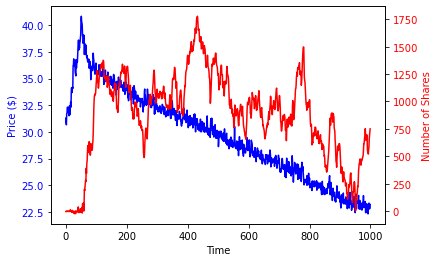

In [6]:
fig, ax1 = plt.subplots()

ax1.plot(price, color='blue')
ax1.set_xlabel('Time')
ax1.set_ylabel('Price ($)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.plot(freeShares, color='red')
ax2.set_ylabel('Number of Shares', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.show()

Effect of Changing the Joe's Personailty
----------------------------------------
To see how agrresive traders affect the stock price, the buy and sell probabiltiy as well as the buy and sell agressiveness can be changed. 

First, a baseline.

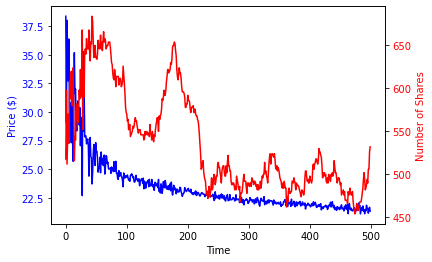

In [7]:
np.random.seed(5)
numHolders = 500
simulationSteps = 500
sharesOwned = np.random.randint(low=20, high=50, size=numHolders)
wealth = np.random.randint(low=1000, high=2000, size=numHolders)
purchasePrice = np.random.uniform(low=20, high=40, size=numHolders)
sellProb = np.random.uniform(low=0.01, high=0.1, size=numHolders)
buyProb = np.random.uniform(low=0.1, high=0.2, size=numHolders)
buyAgg = np.random.randint(low=1, high=5, size=numHolders)
sellAgg = np.random.randint(low=1, high=5, size=numHolders)
aapl = stock(numHolders, 50.0, 400, sharesOwned, wealth, purchasePrice, buyProb, sellProb, buyAgg, sellAgg, 0.1)
price = []
freeShares = []
for i in range(simulationSteps):
    aapl.step()
    price.append(aapl.stockPrice())
    freeShares.append(aapl.freeShares())
    
fig, ax1 = plt.subplots()

ax1.plot(price, color='blue')
ax1.set_xlabel('Time')
ax1.set_ylabel('Price ($)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax2 = ax1.twinx()
ax2.plot(freeShares, color='red')
ax2.set_ylabel('Number of Shares', color='red')
ax2.tick_params(axis='y', labelcolor='red')
plt.show()

Then, increasing the sell probability and agrresiveness. 

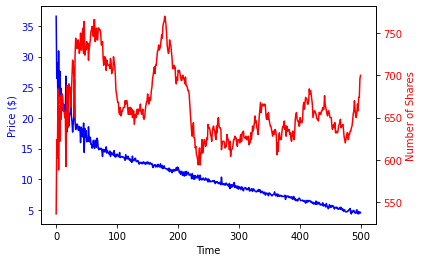

In [8]:
np.random.seed(5)
numHolders = 500
simulationSteps = 500
sharesOwned = np.random.randint(low=20, high=50, size=numHolders)
wealth = np.random.randint(low=1000, high=2000, size=numHolders)
purchasePrice = np.random.uniform(low=20, high=40, size=numHolders)
sellProb = np.random.uniform(low=0.2, high=0.3, size=numHolders)
buyProb = np.random.uniform(low=0.1, high=0.2, size=numHolders)
buyAgg = np.random.randint(low=1, high=5, size=numHolders)
sellAgg = np.random.randint(low=3, high=7, size=numHolders)
aapl = stock(numHolders, 50.0, 400, sharesOwned, wealth, purchasePrice, buyProb, sellProb, buyAgg, sellAgg, 0.1)
price = []
freeShares = []
for i in range(simulationSteps):
    aapl.step()
    price.append(aapl.stockPrice())
    freeShares.append(aapl.freeShares())
    
fig, ax1 = plt.subplots()

ax1.plot(price, color='blue')
ax1.set_xlabel('Time')
ax1.set_ylabel('Price ($)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax2 = ax1.twinx()
ax2.plot(freeShares, color='red')
ax2.set_ylabel('Number of Shares', color='red')
ax2.tick_params(axis='y', labelcolor='red')
plt.show()

Finally, increasing the buy probability and agrresiveness. 

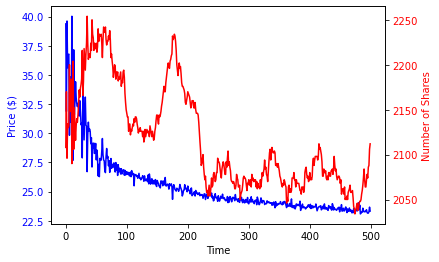

In [9]:
np.random.seed(5)
numHolders = 500
simulationSteps = 500
sharesOwned = np.random.randint(low=20, high=50, size=numHolders)
wealth = np.random.randint(low=1000, high=2000, size=numHolders)
purchasePrice = np.random.uniform(low=20, high=40, size=numHolders)
sellProb = np.random.uniform(low=0.01, high=0.1, size=numHolders)
buyProb = np.random.uniform(low=0.2, high=0.4, size=numHolders)
buyAgg = np.random.randint(low=3, high=7, size=numHolders)
sellAgg = np.random.randint(low=1, high=5, size=numHolders)
aapl = stock(numHolders, 50.0, 2000, sharesOwned, wealth, purchasePrice, buyProb, sellProb, buyAgg, sellAgg, 0.1)
price = []
freeShares = []
for i in range(simulationSteps):
    aapl.step()
    price.append(aapl.stockPrice())
    freeShares.append(aapl.freeShares())
    
fig, ax1 = plt.subplots()

ax1.plot(price, color='blue')
ax1.set_xlabel('Time')
ax1.set_ylabel('Price ($)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax2 = ax1.twinx()
ax2.plot(freeShares, color='red')
ax2.set_ylabel('Number of Shares', color='red')
ax2.tick_params(axis='y', labelcolor='red')
plt.show()

Effect of Changing the Joe's Starting Wealth
--------------------------------------------
Please see report.